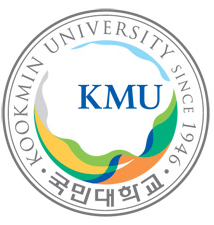

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import cv2 as cv
import numpy as np

# Pytorch CUDA framework
* select gpu

In [2]:
torch.cuda.set_device(1)
print("selection GPU idx : {}".format(torch.cuda.current_device()))

selection GPU idx : 1


# create custom DataLoader

In [3]:
from customDataLoader2 import DataLoader

In [4]:
def default_image_loader(path):
    try:
        #print(path.split("/")[-1])
        img = cv.imread(path)
    except:
        return 0
    img = cv.resize(img, (64, 64), interpolation = cv.INTER_AREA)
    #img = np.expand_dims(img, axis=0)
    #print(img.shape)
    img = img.astype(np.float32)
    cv.normalize(img, img, 0, 1, cv.NORM_MINMAX)
    img = np.transpose(img, [2,0,1])
    img = torch.tensor(img)
    return img

In [5]:
def data_generator():
    # DataLoader( True, , , )  ==> get Training data set.
    train_loader = torch.utils.data.DataLoader( DataLoader(True, default_image_loader), batch_size = 10, shuffle = True)
    #train_loader = torch.utils.data.DataLoader( DataLoader(False, default_image_loader), batch_size = 5, shuffle = True)
    '''
    Python Generator
    *  if you do run this line, you can get a data like the example
    example:
    gen = data_generator()
    
    print(next(gen)) # get data index number 1
    print(next(gen)) # get data index number 2
    
    * as well as, you can uses with loop by enumerate
    for i, data in enumerate(gen, 0):
        print(data)
    '''
    
    for data, label in train_loader:
        yield data, label

# Convolution Net model

In [6]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        
    def forward(self, x):

        return x

# Instance of Neural Network Model class
1) 뉴럴 네트워크 모델을 인스턴스화 한다.<br>
2) ```model.cuda()```는 해당 뉴럴 모델을 GPU 연산으로 처리하고 싶을 때 사용한다.<br>
3) Optimzer는 정답과 추측값의 오차를 줄이기 위하여 어떤 방법으로 오차를 줄여 나갈 지 계산하는 메서드<br>

In [7]:
#instance model.
model = Net()

#-------------------------------------------------#
#      Chenck points loads
#      What is Check points? 
#      This is called a pre trained model
#-------------------------------------------------#
#PATH = "./checkpoint.pt"
#checkpoint = torch.load(PATH, map_location=torch.device('cuda:0'))
#checkpoint.pop('fc.weight', None) # Remove dict-key if current mode has not that.
#checkpoint.pop('fc.bias', None) # Remove dict-key if current mode has not that.

#new = model.state_dict() 
#new.update(checkpoint)
#model.load_state_dict(new)
#-------------------------------------------------#

model.cuda() # GPU mode 

Net(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(3, 3), bias=False)
  (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (norm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (norm3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
  (norm0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_drop): Dropout2d(p=0.5)
  (fc): Linear(in_features=256, out_features=128, bias=False)
  (fc2): Linear(in_features=128, out_features=64, bias=False)
  (fc3): Linear(in_features=64, out_features=20, bias=False)
  (softmax): Softmax()
)

# loss fuction and optimizer

In [8]:
criterion = nn.MSELoss()
#criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # Sthochastic Gradient Discent, learning rate is 0.001, momentum = 0.9
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train Function 

In [9]:
# Training Function
def train(epochs):
    print("*** Trainning ***")
    is_cuda = False
    if torch.cuda.is_available():
        print("*** CUDA Tranning ***")
        is_cuba = True

    '''
    OneHot encoding
    '''
    onehot = torch.zeros([21, 20])
    for index in range(0,20):
        onehot[index][index] = 1
        #print(onehot[index])
    print(onehot)
    '''
    Train the epochs
    '''
    for epoch in range(0,epochs):
        running_loss = 0.0
        
        # data generator
        gen = data_generator()
        for i, data in enumerate(gen, 0):
            images, labels = data
            
            # prediction
            outputs = model(images.cuda())
            
            targets = onehot[labels]
            #targets = targets.argmax(dim=1) 
            
            loss = criterion(outputs, targets.cuda()) 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # loss rate
            running_loss += loss.item()
            if i % 1000 == 999:
                print('[%d, %d] loss : %.3f' % (epoch + 1, i + 1, (running_loss / (epochs + 1)) * 100 ), "%")
                running_loss = 0.0

        #print(outputs)
    print("Finish Trainning")

In [26]:
train(100)

*** Trainning ***
*** CUDA Tranning ***
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:83: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1, 1000] loss : 20.345 %
[2, 1000] loss : 19.980 %
[3, 1000] loss : 19.918 %
[4, 1000] loss : 19.967 %
[5, 1000] loss : 19.723 %
[6, 1000] loss : 19.981 %
[7, 1000] loss : 20.189 %
[8, 1000] loss : 19.995 %
[9, 1000] loss : 19.922 %
[10, 1000] loss : 20.216 %
[11, 1000] loss : 19.532 %
[12, 1000] loss : 19.568 %
[13, 1000] loss : 19.809 %
[14, 1000] loss : 19.494 %
[15, 1000] loss : 19.700 %
[16, 1000] loss : 19.527 %
[17, 1000] loss : 19.234 %
[18, 1000] loss : 19.370 %
[19, 1000] loss : 19.358 %
[20, 1000] loss : 19.627 %
[21, 1000] loss : 19.557 %
[22, 1000] loss : 19.137 %
[23, 1000] loss : 19.403 %
[24, 1000] loss : 19.253 %
[25, 1000] loss : 19.188 %
[26, 1000] loss : 19.597 %
[27, 1000] loss : 18.926 %
[28, 1000] loss : 19.263 %
[29, 1000] loss : 19.213 %
[30, 1000] loss : 19.163 %
[31, 1000] loss : 19.161 %
[32, 1000] loss : 19.018 %
[33, 1000] loss : 18.803 %
[34, 1000] loss : 19.338 %
[35, 1000] loss : 18.972 %
[36, 1000] loss : 18.740 %
[37, 1000] loss : 19.092 %
[38, 1000]

# Prediction and Evaluation

In [27]:
def testLoader():
    test_loader = torch.utils.data.DataLoader( DataLoader(False, default_image_loader), batch_size = 10, shuffle = True)
    for data, label in test_loader:
        yield data, label

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision
from torchvision.transforms import ToPILImage

def test():
    to_img = ToPILImage()
    total = 0
    list = {}
    model.cuda()
    gen = testLoader()
    sum = 0
    num = 0
    for i, data in enumerate(gen, 0):
        
        inputs, labels = data
        outputs = model(inputs.cuda())
        #print(labels, torch.argmax(outputs,dim=1))
        '''
        for input in inputs:
            img_frame = torch.Tensor(input).nomal_()
            to_img(img_frame)
        '''
        #print(labels, "\n", torch.argmax(outputs,dim=1))
        for j in range(len(labels)):
            num = num + 1
            if labels[j].item() == torch.argmax(outputs, dim=1)[j].item():
                #print(labels[j].item(), torch.argmax(outputs, dim=1)[j].item())
                sum = sum + 1
    
    print("Validation dataset : {}".format(num))
    print("Total Accuracy \n", (sum / 2013) * 100, "%" )
    #return labels, outputs

In [29]:
for i in range(0, 50): test()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:83: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Validation dataset : 2013
Total Accuracy 
 61.54992548435171 %
Validation dataset : 2013
Total Accuracy 
 63.785394932935915 %
Validation dataset : 2013
Total Accuracy 
 61.99701937406855 %
Validation dataset : 2013
Total Accuracy 
 62.940884252359666 %
Validation dataset : 2013
Total Accuracy 
 62.14605067064084 %
Validation dataset : 2013
Total Accuracy 
 61.1525086934923 %
Validation dataset : 2013
Total Accuracy 
 62.04669647292598 %
Validation dataset : 2013
Total Accuracy 
 62.24540486835569 %
Validation dataset : 2013
Total Accuracy 
 63.189269746646794 %
Validation dataset : 2013
Total Accuracy 
 62.49379036264282 %
Validation dataset : 2013
Total Accuracy 
 61.74863387978142 %
Validation dataset : 2013
Total Accuracy 
 61.74863387978142 %
Validation dataset : 2013
Total Accuracy 
 61.59960258320915 %
Validation dataset : 2013
Total Accuracy 
 61.54992548435171 %
Validation dataset : 2013
Total Accuracy 
 61.798310978638845 %
Validation dataset : 2013
Total Accuracy 
 61.847988